---
title: "Futbolda dağılımlarla düşünme"
description: "Sezgi neden kompleks kararlarda yanıltır? p-value’nun “dansını” 2015-2016 Premier League xG verisiyle simüle edip power, örneklem ve gürültüyü konuşuyoruz."
image: thumbnail.png
image-alt: "Futbolda dağılımlarla düşünme"
author: "Murat Seyhan"
format:
  html:
    toc: true
    toc-depth: 3
    code-fold: false
    code-tools: true
    theme: cosmo
    page-layout: full
jupyter: python3
execute:
  code-fold: true
  code-tools: true
  freeze: auto
categories: [Football Analytics]
---


### Giriş
Karar alımı konusuna bir süredir takmış durumdayım. İnsan sezgisinin, doğası gereği çok boyutlu problemlerde karar verme konusunda zayıf olduğunu düşünüyorum. Primitif kararları çok rahatlıkla verebilsek bile kompleks problemlerde sezgisel karar vermemizin rastgele seçimlerden pek bir farkı yok. Bu noktada ortam da çok önemli. Eylemlerimiz sonucunda yüksek derecede düzenli ve hızlı sonuç aldığımız bir alanda çalışıyorsak sezgimize daha fazla güvenebiliriz.

Birçok yanlılık ve kısayolun tümüyle çözümü yok, hepimiz bunlara açığız ama çeşitli alışkanlıkları inşa ederek genel anlamda daha doğru kararlar vermemizin de yolu açılıyor. Karar alımında nispeten geliştiğimi hissettiğim durumların çoğu, işin sonunda sezgilerime birçok konuda güvenmeyerek hareket ettiğim zamanlarda yaşandı. Ben de yeni alışkanlıklar edinirken istatistiksel düşünme biçimini kulanmaya çalıştım. Hala kat edilecek çok yolum olduğunun farkındayım.

Bu yolu kat ederken ise herkes gibi, günlük hayattan örneklerle daha rahat anlıyorum çalıştığım şeyleri. Bu sebeple yazdığım şeylerde de bağlam keşfini ve analojiyi sıklıkla kullanmaya çalışıyorum. Günlük hayatımda farklı alanlarda verdiğim kararları, öğrendiklerimle eşleştirmek faydalı oluyor. Bu kararlardan sonrakinde, her öğrendiğim düşünme biçimini yerleşik hale getirmeye de çalışıyorum. Diğer bağlamlara transfer edilebilir yetenekler edinebilmek önemli.

Yaklaşık 5 yıldır veri analitiği alanında çalışmamın vermiş olduğu gözlem birikimi beni alanda sık kullanılan sezgisel seçimleri irdelemeye itti. Bu blogda yazmak üzere klavyenin başına geçtiğim konu da, sıkça kullanılan ve “rule of thumb” adı altında epey yaygınlaşmış kullanımlardan biri: “p-value”.

---

P-value ile ilgili en temel problem şu: çoğu zaman onu **_“tek atışlık bir karar etiketi”_** gibi kullanıyoruz. Oysa p-value, tek bir sayı olarak elimize düşse de arkasında bir **oynaklık** taşıyor; aynı gerçek etki altında bile farklı örneklemlerle tekrar tekrar ölçtüğünde p bazen küçük, bazen büyük gelebiliyor. [_Önceki yazı_](https://mseyhan.github.io/tr/posts/regression_mean/regression_to_the_mean.html)da “uçlar yanıltır” derken kastettiğim şey, tek bir gözlemi evren sanmaktı. Burada aynı fikri daha farklı bir yere taşıyacağız: **tek bir p, gerçekliği temsil etmek zorunda değil**. Bazen sadece kötü şansla “önemsiz” görünür, bazen iyi şansla “çok anlamlı” görünür. Yani p-value biraz [_dans eder_](https://www.youtube.com/watch?v=5OL1RqHrZQ8). Ve gördüğüm kadarıyla veri analitiği alanında yaygın bir kavrama dönüşen bu kavramın dansı yok sayılıp, tek atışlık bir karar etiketi gibi kullanılıyor.

Bu yazıda işleri daha sezgisel ve anlaşılabilir kılmak için okura iki ayrı “evren” izletme yöntemine gideceğim; sanki aynı filmin iki farklı versiyonu varmış gibi düşünelim. 

Birinci evrende **H0 dünyası** var: gerçekte iki şey arasında fark yok, yani ortada yakalanacak bir sinyal bulunmuyor. 

İkinci evrende ise **H1 dünyası** var: gerçekte fark var, ama sinyalin gücü ve gürültünün seviyesi yüzünden her ölçümde aynı netlikte görünmüyor. 

Aynı p-value kavramı bu iki dünyada bambaşka davranıyor: birinde yanlış alarmlar “doğal”, diğerinde ise gerçek sinyal olmasına rağmen bazen alarm çalmaması “normal”. Ben de bu iki evreni yan yana koyduğumda, p-value’yu bir sonuç damgası değil, **sezgisel kararlarımızı ayarlamamıza yarayan bir frekans fikri** olarak okumaya başlamıştım.

::: {.callout-note collapse="true" title="Metot ve hangi verinin kullanılacağı üzerine notlar"}

Bu noktada soyut kavramları havada bırakmak istemiyorum; çünkü benim derdim zaten “sezgisel karar” meselesi. Gerçek hayatta karar verirken elimizde çoğu zaman tek bir deney yok—bir sürü küçük gözlem, belirsiz sinyal, gürültülü sonuç var. Futbol bu açıdan mükemmel bir laboratuvar: bir defa herkesin fikri var :), verisi bol, ama kararlar (oyuncu formu, transfer, teknik direktör değişimi) çoğu zaman tekil maçlara veya kısa serilere yaslanıp veriliyor. Dolayısıyla p-value gibi “tek sayı”ların bizi nasıl yanıltabildiğini anlatmak için futbol verisi iyi bir zemin.

Bunu gösterirken gerçek bir futbol verisinden yararlanmak istedim. StatsBomb’un Open Data seti, bazı lig ve turnuvaların olay (event) bazlı verisini açık şekilde paylaşıyor. Tüm blog kolaylıkla reproduce edilebilecek bir fikrin sağlaması üzerine olacak ve ben **Premier League 2015–16 sezonunu** kullanacağım. Hem sezon boyunca hikâyesi çok güçlü (Leicester’ın şampiyonluğu), hem de zamanında canlı takip ettiğim için bağlamı zihnimde canlı. Neyi ölçmeye çalıştığımızı soyut A/B örnekleri yerine, herkesin gözünde bir görüntüsü olan bir dünyaya koymak daha kolay diye düşünüyorum.

Teknik olarak Python’da `statsbombpy` ile Open Data’ya bağlanıp sezonun maçlarını çekiyoruz; sonra her maçın event verisinden şutları alıp şut başına beklenen gol değerini (`shot_statsbomb_xg`) kullanıyoruz. Bu metrik bildiğiniz üzere hem futbolda artık yaygın bir kerteriz noktası, hem de sonuç (gol oldu/olmadı) yerine süreç ölçümüne daha yakın olduğu için gürültüyü azaltıyor. Yazının devamında göreceğin simülasyonlarda da bu şut-xG dağılımını kullanarak, aynı soruyu tekrar tekrar sormuş gibi yapacağız: *“Bu iki grubun ortalama şut kalitesi gerçekten farklı mı?”* İşte p-value’ın dansı, gerçek futboldan gelen bu gürültülü örneklem üzerinde çok daha görünür hale geliyor.

:::

---

### Yapacağımız deney: aynı soruyu binlerce kez sormak

Elbette “p-value dans eder” lafını soyut bir iddia olarak bırakmayacağız. **Aynı karşılaştırmayı binlerce kez tekrar ediyor gibi yapıp** p-value’ların şeklini göreceğiz.

Bu yüzden, makul bir fark beklediğimiz iki grup seçiyorum:

- **Attacker**: forvet, kanat gibi daha çok bitiricilik yapan pozisyonlar
- **Defender**: stoper/bek gibi savunma ağırlıklı pozisyonlar

Bu ikiliyi seçmemin sebebi şu: şut başına xG (şut kalitesi) dediğimiz şey, rol ve pozisyonla fazlasıyla alakalı. Hücumcuların daha _“tehlikeli”_ addedilen bölgelerde daha sık şut bulması beklenir; savunmacıların şutları daha nadir ve daha düşük kaliteli olabilir. Kompany [_o şutu_](https://www.youtube.com/watch?v=Q37w_Da4dPA) çekerken çok iyi hissetmiş ve çok iyi vurmuş olabilir, ama yine de gol olma ihtimali düşüktü.. :) Genel olarak bu gruplama, H1 dünyamız için makul bir _“gerçek fark”_ hipotezi veriyor.

H0 dünyasını da şöyle kuracağız: **gerçekte fark yokmuş gibi** iki grubu aynı havuzdan üreteceğiz. Bunu yapmak için de tüm oyuncuların şutlarını tek bir havuzda topluyoruz, sonra rastgele seçimle iki gruba ayırıyoruz. Böylece her iki grubun da ortalama şut kalitesi aynı dağılımdan gelmiş oluyor.

### Veriyi çekme ve ön hazırlık

Aşağıdaki hücreler StatsBomb Open Data’dan Premier League 2015–16 sezonunu seçip tüm maçların event verisini çekiyor, sonra da sadece şutları alıp `shot_statsbomb_xg` alanını topluyor.

In [9]:
#| echo: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from statsbombpy import sb
from statsbombpy.api_client import NoAuthWarning
import warnings
warnings.filterwarnings("ignore", category=NoAuthWarning)


In [10]:
# tüm müsabakaların çekilmesi
comps = sb.competitions()

# premier league 2015–16 için id seçimi
competition_id = 2
season_id      = 27

matches = sb.matches(competition_id=competition_id, season_id=season_id)
match_ids = matches["match_id"].tolist()


Sırada, tüm maçlardan şutları alıp iki gruba ayırmak var. Burada amacım “mükemmel pozisyon sınıflaması” yapmak değil; **sezgilerimizle bağdaşan, makul iki kategori** yaratmak. 

::: {.callout-note collapse="true" title="Kod: Event verisini çekme ve ön hazırlık"}
```python
KEEP_COLS = [
    "match_id",
    "type",
    "position",
    "shot_statsbomb_xg",
    "team",
    "player_id",
    "under_pressure",
]

shots_list = []

for mid in match_ids:
    df = sb.events(match_id=mid)

    # shot'lara filtre
    df = df[df["type"] == "Shot"]

    # yalnızca lazım kolonlar
    cols = [c for c in KEEP_COLS if c in df.columns]
    df = df[cols]

    # boşları alalım
    df = df.dropna(subset=["shot_statsbomb_xg", "position"])

    shots_list.append(df)

shots = pd.concat(shots_list, ignore_index=True)

for c in ["position", "team"]:
    if c in shots.columns:
        shots[c] = shots[c].astype("category")

shots["shot_statsbomb_xg"] = shots["shot_statsbomb_xg"].astype("float32")

shots["pos_group"] = np.where(
    shots["position"].str.contains("Forward|Striker|Winger", case=False, na=False),
    "Attacker",
    np.where(shots["position"].str.contains("Back|Defender", case=False, na=False), "Defender", "Other")
)

shots = shots[shots["pos_group"].isin(["Attacker", "Defender"])]
```
:::


In [11]:
#| echo: false

KEEP_COLS = [
    "match_id",
    "type",
    "position",
    "shot_statsbomb_xg",
    "team",
    "player_id",
    "under_pressure",
]

shots_list = []

for mid in match_ids:
    df = sb.events(match_id=mid)

    # shot'lara filtre
    df = df[df["type"] == "Shot"]

    # yalnızca lazım kolonlar
    cols = [c for c in KEEP_COLS if c in df.columns]
    df = df[cols]

    # boşları alalım
    df = df.dropna(subset=["shot_statsbomb_xg", "position"])

    shots_list.append(df)

shots = pd.concat(shots_list, ignore_index=True)

for c in ["position", "team"]:
    if c in shots.columns:
        shots[c] = shots[c].astype("category")

shots["shot_statsbomb_xg"] = shots["shot_statsbomb_xg"].astype("float32")

shots["pos_group"] = np.where(
    shots["position"].str.contains("Forward|Striker|Winger", case=False, na=False),
    "Attacker",
    np.where(shots["position"].str.contains("Back|Defender", case=False, na=False), "Defender", "Other")
)

shots = shots[shots["pos_group"].isin(["Attacker", "Defender"])]

Aşağıda da görüldüğü üzere, sezon verisinde yeterince şut var. 

In [12]:
len(shots)

4286

### Gerçek fark ve sıfır fark dünyalarının simülasyonu

Burada kilit fikir şu: p-value tek seferlik bir sonuç değil; çünkü gösterdiği şey **boş hipotezimizin gerçek olduğu varsayımı altında örneklemimizden gelen ortalamanın ne kadar olası olduğu**. Örneklemimiz bambaşka da olabilirdi, çünkü rastgele seçim yaptık. Bu noktada p-value'ların farklı örneklem büyüklüklerine göre bir dağılımı olmak durumunda. Biz de bu dağılımı büyük sayılar kanununun yardımıyla aynı deneyi 20.000 kez tekrarlayarak canlandıracağız.

- **H1-benzeri simülasyon (gerçekte fark var):** Attacker ve Defender gruplarından ayrı ayrı örneklem çekiyoruz; her tekrarda iki ortalamayı karşılaştırıp p hesaplıyoruz.
- **H0-benzeri simülasyon (gerçekte fark yok):** İki grubun da aynı havuzdan geldiğini varsayıp, tek bir havuzdan iki örneklem çekiyoruz; yine p hesaplıyoruz.

In [19]:
# H1: İki grup farklı havuzdan geliyor.
def simulate_pvals(df, group_col, value_col, g1, g2, n=100, B=20000, seed=0):
    rng = np.random.default_rng(seed)
    x = df[df[group_col] == g1][value_col].to_numpy()
    y = df[df[group_col] == g2][value_col].to_numpy()

    p = np.empty(B)
    for i in range(B):
        xs = rng.choice(x, size=n, replace=True)
        ys = rng.choice(y, size=n, replace=True)
        p[i] = stats.ttest_ind(xs, ys, equal_var=False).pvalue
    return p

# H0: İki grup aynı havuzdan geliyor.
def simulate_pvals_null_by_permutation(df, group_col, value_col, g1, g2, n=100, B=20000, seed=1):
    rng = np.random.default_rng(seed)
    sub = df[df[group_col].isin([g1, g2])][[group_col, value_col]].dropna().copy()
    vals = sub[value_col].to_numpy()

    p = np.empty(B)
    for i in range(B):
        xs = rng.choice(vals, size=n, replace=True)
        ys = rng.choice(vals, size=n, replace=True)
        p[i] = stats.ttest_ind(xs, ys, equal_var=False).pvalue
    return p

Burada `n=50` gibi bir değer seçtiğimde, aslında şunu yapıyorum: “Her evrende, sanki **50 şutluk iki mini-örneklem** alıp (Attacker vs Defender) aralarında fark var mı diye bakıyorum.” Futboldaki ‘tek maçtan hüküm verme’ hissine denk düşen şey tam da bu: **küçük örneklem**.


### H0 dünyasında p-value’lar neden “düz çizgi” gibi görünür?

H0 dünyasında gerçekte fark yok. O yüzden p-value üretmek, kabaca **0 ile 1 arasında her yere eşit şansla dağılmış** sayılar üretmek gibi. 0.08 de 0.98 de aynı derecede sıradan.

Bunu sadece lafla değil, doğrudan veriden alınan çıktılarla görelim.

::: {.callout-note collapse="true" title="Kod: Histogram fonksiyonu"}
```python
def plot_hist(p, title="", bins=20, alpha=0.05, density=False, show_expected=True):
    p = np.asarray(p, dtype=float)
    p = p[np.isfinite(p)]
    p = p[(p >= 0) & (p <= 1)]

    frac_sig = (p < alpha).mean()

    fig, ax = plt.subplots(figsize=(8.5, 4.8))
    edges = np.linspace(0, 1, bins + 1)

    ax.hist(p, bins=edges, density=density)
    ax.axvline(alpha, linestyle="--")

    if show_expected:
        if density:
            ax.axhline(1.0, linestyle=":")
        else:
            expected = p.size / bins
            ax.axhline(expected, linestyle=":")

    main_title = title.strip() if title else "p-value distribution"
    ax.set_title(f"{main_title} | n={p.size:,} | P(p<{alpha})={frac_sig:.3f}")
    ax.set_xlabel("p-value")
    ax.set_ylabel("density" if density else "count")

    ax.set_xlim(0, 1)
    ax.grid(True, which="major", axis="both", alpha=0.25)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()
```
:::


In [14]:
#| echo: false

def plot_hist(p, title="", bins=20, alpha=0.05, density=False, show_expected=True):
    p = np.asarray(p, dtype=float)
    p = p[np.isfinite(p)]
    p = p[(p >= 0) & (p <= 1)]

    frac_sig = (p < alpha).mean()

    fig, ax = plt.subplots(figsize=(8.5, 4.8))
    edges = np.linspace(0, 1, bins + 1)

    ax.hist(p, bins=edges, density=density)
    ax.axvline(alpha, linestyle="--")

    if show_expected:
        if density:
            ax.axhline(1.0, linestyle=":")
        else:
            expected = p.size / bins
            ax.axhline(expected, linestyle=":")

    main_title = title.strip() if title else "p-value distribution"
    ax.set_title(f"{main_title} | n={p.size:,} | P(p<{alpha})={frac_sig:.3f}")
    ax.set_xlabel("p-value")
    ax.set_ylabel("density" if density else "count")

    ax.set_xlim(0, 1)
    ax.grid(True, which="major", axis="both", alpha=0.25)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

Aşağıdaki grafik, H0 dünyasında 20.000 kez yapılan simülasyonun p-value dağılımını gösteriyor. Görüldüğü üzere, p-value’lar 0 ile 1 arasında neredeyse eşit şekilde dağılmış durumda.

H0-like P(p<0.05): 0.04755


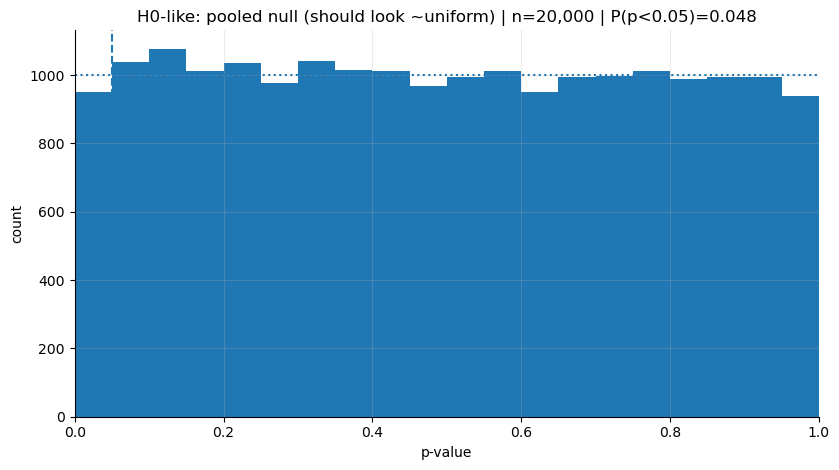

In [15]:
p_h0 = simulate_pvals_null_by_permutation(
    shots, "pos_group", "shot_statsbomb_xg", "Attacker", "Defender", n=50, B=20000, seed=1903 # bjk
)

print("H0-like P(p<0.05):", (p_h0 < 0.05).mean())
plot_hist(p_h0, "H0-like: pooled null (should look ~uniform)")

**H0 dünyasında küçük p “kötü” değil; sadece yanlış alarmın kaçınılmaz bedeli.** Eşiği 0.05 seçtiysen, gerçekte fark olmasa bile uzun vadede her 100 denemenin yaklaşık 5’inde p<0.05 görmeyi zaten kabul etmiş oluyorsun. Yani eğer boş hipotez doğruysa ve etki yoksa bile, yapılan 100 deneyin 5’inde yanlışlıkla “anlamlı fark var” sonucuna varacağız ve bu treshold'u direkt olarak biz belirledik.


### H1 dünyası: gerçek fark varsa p’ler sola yığılır, ama bazen yine büyük çıkar?

Bu evrenimizde Attacker ve Defender’ı gerçekten ayrı havuzlar gibi ele aldığımız için, a priori düşüncemiz doğruysa, ortalamalar gerçekten ayrılmaya meyilli olacağı için p-value’lar 0’a doğru yığılmaya başlar.

Ama günlük her basit kararda “p<0.05 ise etki vardır" sezgisi yanlış ve bunu p-value'ların dağılımını aklımıza getirmediğimiz sürece anlayamayabiliriz. Sezgisel olarak aklımıza gelen ilk şey bu gördüğümüz sayının etkinin var olduğuna dair kesin kanıt sunduğu olur. Oysa gerçek hayatta, özellikle küçük örneklemlerde, bazen p büyük de çıkabilir. Yazı tura oyunu oynadığımızı düşünelim. Para biraz hileliyse bile, 10 atışta bazen adil gibi görünür. 

Futboldaki karşılığı çok tanıdık. Bir forvet gerçekte iyi bitirici olsa bile, **tek maçta** 2 net pozisyon kaçırabilir. Veya hakemler çok konuşulduğu için söylüyorum, pratik olarak anlamlı şekilde art niyetli karar veriyor olsalar bile, 1-2 maç bakıp da kötü niyetli kararı veremeyebiliriz, çok adil yönetiyor gibi de görünebilirler.

H1-like P(p<0.05): 0.5935


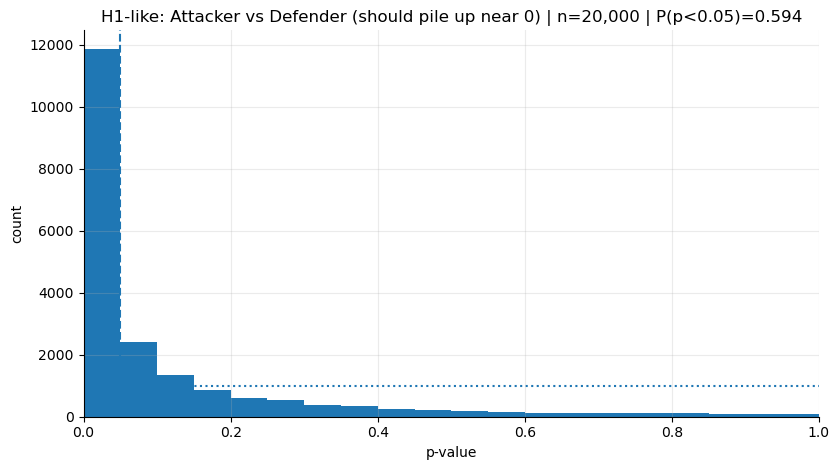

In [ ]:
p_h1 = simulate_pvals(
    shots, "pos_group", "shot_statsbomb_xg", "Attacker", "Defender", n=50, B=20000, seed=1903 # bjk
)

print("H1-like P(p<0.05):", (p_h1 < 0.05).mean())
plot_hist(p_h1, "H1-like: Attacker vs Defender (should pile up near 0)")

Grafikte göze çarpan ilk şey, doğal olarak sola yatıklık oluyor. Ama yine de sağ tarafta barlar görebiliyoruz.

Bu yüzden p’yi tekil bir sonuç değil, **şekli olan bir şey, bir dağılım** olarak algılamaya başlamalıyız. Sağ tarafa düşen p'lerin olması bize şunu gösterir:

> *Etki varken bile bazen ‘non-significant’ sonuçlar beklenir; buna karar veren şey örneklemin gücü (power) ve gürültünün seviyesi.*

Şimdi power’ı, bu histogramların üstünde konuşulabilir hale getirelim: _“P(p<0.05)”_ aslında hangi evrende ne kadar alarm beklediğimizin sayısallaşmış hali.

---

### Power: histogramdaki “alfa çizgisinin solu”

Histogramları çizdirirken 0.05’teki kesikli mavi dik çizgiyi (alfa) özellikle koydum. Çünkü bu çizgi, “bu eşiğin altında kalırsa **alarm veririm**” dediğimiz sınır.

Aslında **power** dediğimiz şey, H1 dünyasında bu çizginin solunda kalan alan:

> **Power = P(p < α | H1 doğru)**

Bunu karmaşık bir şey gibi düşünmeyelim, sadece şunu söylüyor:

> Eğer gerçekte fark varsa ve ben aynı deneyi tekrar tekrar yapsaydım kaç tanesinde “p<0.05” görüp *‘tamam, sinyal var’* diyecektim?

Grafiğin başlığındaki `P(p<0.05)=...` ifadesi, tam olarak “alfa çizgisinin solundaki pay”.

- H0 grafiğinde (uniform olan) bu değer yaklaşık **0.05** çıkıyor: çünkü ortada sinyal yokken eşiğin kendisi yanlış alarm oranını belirliyor.
- H1 grafiğinde (sola yığılan) bu değer artık **power** oluyor: gerçek fark varken alarmın ne kadar sık çaldığı.

Power %50 ise, aynı karşılaştırmayı 100.000 kez yaptığımızda yaklaşık 50.000’inde `p<0.05` göreceğiz. En başında değindiğimiz, “bugün p çıkmadı → etki yok” gibi bir cümle, çoğu zaman şunu atlar: belki de bu deneyin power’ı düşük, yani **etki varken bile** sık sık “çalmayan alarm” görmen bekleniyor.

`n=50` dediğimizde aslında “her gruptan 50 şutluk bir mini-örneklem” alıyoruz. Bazı maçlarda/serilerde 50 şut bile toplanmıyor; örneklem küçük kaldıkça gürültü büyüyor ve power düşüyor. Sonuç: gerçek fark olsa bile p bazen sağ tarafta kalıyor.

Bir sonraki adımda sezgiyi **tersinden** göstereceğiz: “n’i büyütürsen güç artar” doğru ama bunu daha iyi anlamanın yollarından biri bazen **n’i küçültüp** neler kaybettiğini görmek.

Az önceki grafikte `n=50` ile (her gruptan 50 şutluk mini-örneklemler) p’lerin belirgin biçimde sola yığıldığını gördük. Şimdi aynı şeyi daha küçük bir örneklemle **n=5** ile yapalım. Her seferinde hücumcular arasından 5 şut, defanslar arasından 5 şut alıp test edeceğiz. Bu, özellikle hücumcular söz konusu olduğunda “tek maçtan hüküm vermek”ten bile daha sert olabilir. Bir forvet maç başına 5'ten fazla şut rahatlıkla çekebilir. Henüz maçı bitirmeden yargılamak gibi bir şey.

Aşağıdaki grafikte H1 dünyasında şunları göreceğiz:

1) **Alfa çizgisinin** (0.05) solunda kalan kısım küçülecek — yani başlıkta yazan `P(p<0.05)` düşecek.

2) Histogramın “sola yapışma” hissi azalacak; p’ler daha çok sağa yayılacak.

H1-like P(p<0.05): 0.03405
H0-like P(p<0.05): 0.04755


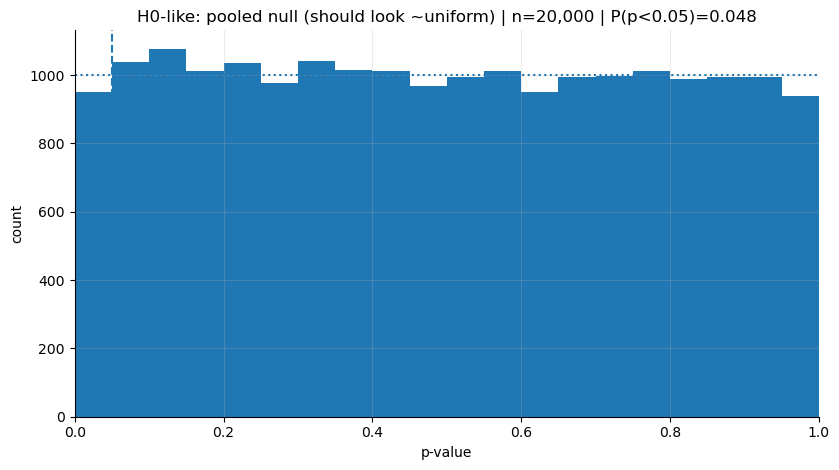

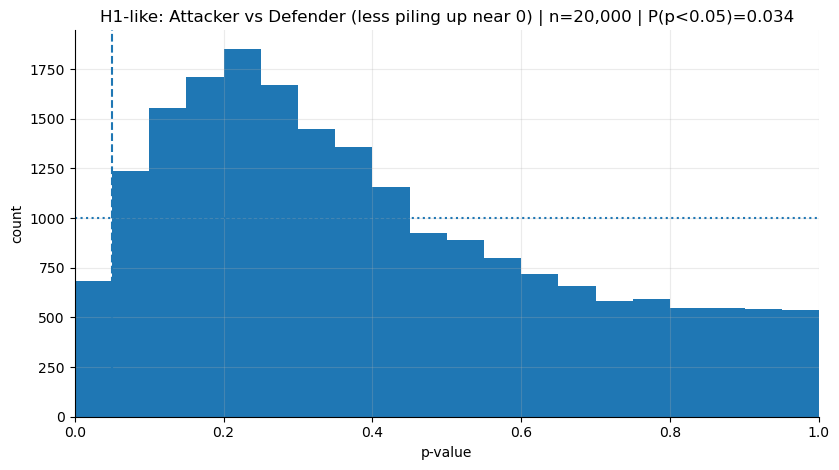

In [17]:
p_h1 = simulate_pvals(
    shots, "pos_group", "shot_statsbomb_xg", "Attacker", "Defender", n=5, B=20000, seed=1903 # bjk
)

# H0'ı aynı şekilde bırakıyoruz: referans çizgimiz (uniformluk) değişmesin
p_h0 = simulate_pvals_null_by_permutation(
    shots, "pos_group", "shot_statsbomb_xg", "Attacker", "Defender", n=50, B=20000, seed=1903 # bjk
)

print("H1-like P(p<0.05):", (p_h1 < 0.05).mean())
print("H0-like P(p<0.05):", (p_h0 < 0.05).mean())

plot_hist(p_h0, "H0-like: pooled null (should look ~uniform)")
plot_hist(p_h1, "H1-like: Attacker vs Defender (less piling up near 0)")

Buradaki mesaj bence çok net: **Gerçek fark varken bile**, eğer her seferinde elinde sadece 5’er şut varsa, “anlamlı sonuç” beklemek gerçekçi değil. 

Düşük örneklemle verdiğimiz kararlar, çoğu zaman “gerçek yok”tan değil, **görememekten** kaynaklanır. Yaygın olarak görülen, taraftar veya yönetici fark etmeksizin tek maçtan oyuncu formu, takım kimyası, teknik direktör etkisi gibi büyük laflar etmeye bu kadar müsait olmamızın nasıl zararlı olabileceğini buradan anlayabiliriz.

---

## Nerede yanlış karar veriyoruz?

Aslında basitçe, **tek örneklemi, dağılım sanıyoruz.**

P-value günlük hayatta çok kullandığımız bir kavram değil belki, ama zihnimizde bir fark veya etki tespit ettiğimiz her an, aslında p-value benzeri bir süreci işletiyoruz. Gördüğümüz şeyin normalden farklı olduğunu düşünüyor, ve normlarımıza göre bir test başlatıyoruz zihnimizde. **Bu farklılık gözümüze büyük geliyorsa ve etrafımızdaki normların genel sapmasından daha uzak bir noktadaysa “anlamlı” kabul ediyoruz.** Ancak genellikle bunlar tekil veya az sayıda gözlemlerden geliyor.

Ben de p-value'yu “tek sonuç” değil “tekrar eden bir sürecin çıktısı” olarak görmeye başladığımda, aslında çoğu zaman sadece gürültünün şans eseri karşımıza çıkmasını abarttığımızı düşünmeye başladım. Ama biz onu karakter analizi, form tespiti, hatta milyon euroluk kararların temeli yapıyoruz.

Bence sık düşülen kalıp hatalar var, örneğin:

### - Tek büyük maçtan karakter analizi yapıyoruz
```text
Derbiyi kötü yönetti, yenildik. → “Büyük maçların hocası değil.”
```

Bu yorum problemli çünkü “derbi performansı” denen şey içinde bir sürü rastgelelik taşıyor. Erken yenilen gol, hakem kararı, bir iki kritik top kaybı… Bir oyuncunun gerçek seviyesini ölçmek yerine, dağılımdan çekilmiş tek bir örneği (o günkü realizasyonu) alıp kişilik analizi yapıyoruz.

### - Skora veya sonuçlara aşırı bağlanıyoruz
```text
2 gol attı → “formda.”
```

Gol, futbolun en gürültülü çıktısı. Biz ise çoğu zaman sonucu kutsayıp süreci görmezden geliyoruz: şutun nereden geldiği, şut kalitesi (xG), oyuncunun rolü, takımın onu hangi bağlamda pozisyona soktuğu… Biz xG kullandık  (`shot_statsbomb_xg`) tam da bu yüzden iyi bir örnek: gol olup olmamasından bağımsız, şutun “tehlike” seviyesine daha yakın bir süreç metriği.

### - Kısa seriyle pahalı kararlar veriyoruz

```text
10–15 maç → “sat / kirala / hoca kov.”
```

Bu, pahalı kararları demin anlattığımız bağlamla _“power’ı düşük bir ölçümle”_ almak demek. Süper Lig’de bazen 10 maçta bir teknik direktör değişiyor. 10 maçlık seri, futbolun gürültüsünde çok küçük bir pencere. Burada gördüğümüz şey, çoğu zaman gerçek performans değil, rastgelelikten gelen sapmalar.

Örneğin [BozzStats](https://x.com/BozzStatz)'ın hep çok güldüğüm bir görselleştirmesi var.

[BozzStats Hocam Grafiği](https://hocam.bozzstatz.com/)


## Bu bilgi, nasıl daha iyi karar almamıza yardımcı olur?

Daha önce de bahsettiğim gibi farklı bağlamlara transfer edilebilir yetenekler edinmeye çalışmak çok önemli. Bu bilgiyi daha iyi karar alabilmek için küçük refleksler geliştirme çabasında kullanabiliriz.

### - Küçük örneklemle _(1-5 karar noktası)_ karar verme alışkanlığına son ver
Tek maçtan hüküm vermek yerine, “Bu performansı hangi seri içinde görüyorum?” diye kendini frenleme alışkanlığı edinmek. Bu konularda düşünmek için sorular:

- Aynı oyuncu benzer rollerde, benzer rakiplere karşı benzer kararlar mı veriyor?
- Koşullar değişti mi? (rol, sakatlık, taktik, maçın akışı)

Bu, p-value dilinde şu anlama geliyor: **tek bir p ile karar verme; sürecin tekrarlanabilirliğini ara.**

### - Pahalı kararların kanıt eşiğini yükselt
Bir kararın maliyeti yükseldikçe, “kanıt” eşiğini de yükseltmek gerekir.

- Hocayı kovmak / oyuncu satmak / büyük kontrat vermek gibi kararlar, tek maçlık hissiyatla değil, daha güçlü bir sinyal ve daha sağlam örneklemle alınmalı.

Bunu notebook’taki `n=5` deneyini aklımıza getirerek yapabiliriz. Örneklem küçüldüğünde power düşüyor ve “etki varken bile” net sonuç görmek zorlaşıyor. Pahalı kararlarda bu riski göze almak istemeyiz.

### - Sonuç metriği yerine süreç metriği kullanmaya çalış
Gol/puan gibi sonuç metrikleriyle karar vermek yerine süreç metrikleri (xG, şut kalitesi, pas bağlantısı, pres aksiyonları, topu üçüncü bölgeye taşıma vb.) daha stabil sinyaller verebilir.

Genel olarak süreci geliştirmeye odaklanmak ve sonuçların gelmesini beklemek, tekil sonuçlara aşırı bağlanmaktan daha sağlıklı olabilir.  
